# <center>Yield prediction of various farm processing units</center>
---

## Abstract

> Supply chain management is an integral part of any business to maintain the transformation of raw materials to finished goods and services. It helps to maximize the customer value and gain advantage in the marketplace. For years, suppy chain management has helped businesses flourish and create a brand value in the marketplace. 

> Businesses have been implementing supply chain management with the help of tradtional, paper-based methods. With the help of _data science_, businesses have not only optimized this process and get better predictions, but also capture real-time decisions to significantly improve the stratergies and performance metrics.

> Supply chain management produces benefits like enhanced strategies, lower operating costs, higher profits and increased collaborations. 


---



## Introduction

> This report outlines the findings of the `train_data`, `farm_data` and `train_weather` data analysis that has been performed as a part of the curriculum at **International School of Engineering (INSOFE)**, under the module **CSE 9099c_PHD (Project Hackathon and Defense (PHD)).**

1. _Key Documents_
  > The data received for the analysis is as follows:
  1. `train_data.csv` : It consists information about the yield of each ingredient produced by each farm on a daily basis.
  2. `farm_id.csv` : It consists of the description of each farm and the deidentified location.
  3. `train_weather.csv` : It consists of the information of hourly weather conditions of each day for the year 2016. 
  
2. _Methodology_

  > Before starting the analysis, we have **merged** all the three dataframes using Python functions.  
The graphs and plots present in this report are made using TABLEAU and Python's data visualization libraries. 
TABLEAU gives flexibility to visualize multiple plots at once and hence extract information from the user-friendly API.

3. Breakdown of this notebook
  > 1. Importing Libraries
  2. Loading the dataset(s)
  3. Data Cleaning:
      - Deleting redundant columns.
      - Remove/filling the NaN values from the datasets.
      - 
  4. Merging the datasets
  5. Exploratory data analysis and Data visualization
  6. Regression Analysis:
    1. Linear Regression
    2. AdaBoost Regression
    3. Catboost Regression
    4. Artificial Neural Network



---



<div class="alert alert-success">
<b>This report consists only model building. The visualization report is present in the reporsitory, or click on the link here:
</b></div>

 https://github.com/NeerajKhadagade29/Agriculture-Supply-Chain/blob/master/data_visualization_report.ipynb

# Model Building

In [3]:
# Importing the final, merged datasets for further model building
# Parsing the dates in 'timestamp' format

main_data = pd.read_csv('/content/drive/My Drive/Colab/model_train.csv', parse_dates = ['date'])
main_test = pd.read_csv('/content/drive/My Drive/Colab/model_test.csv', parse_dates = ['date'], index_col = 'id')

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
# Creating copies of the training and the testing dataframes

data = main_data.copy()
test = main_test.copy()

Since we have the feature `date` in the dataframes, we will extract the `month`, `day` and `hour` components for our model buidling.

In [0]:
# Pandas faciliates us to extract the date components using '.dt.month/day/hour`

for df in [data, test]:
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['day'] = pd.to_datetime(df['date']).dt.day
    df['hour'] = pd.to_datetime(df['date']).dt.hour

We shall be dropping few features from the dataframes for the reasons(s):
 1. `date` : The datetime components have been extracted. Hence, we can drop this feature.
 2. `dew_temp` : This feature has about **80 %** correlation with `temp_obs`. We have dropped in order to avoid problem of multicollinearity.
 3. `farming_company` : This feature has many 16 catergories. To reduce the categorical features, we have dropped this feature.
 4. `deidentified_location` : This columns was used to merge the dataframes and extract the weather information of each farm. Hence, we can now drop it.
 

In [0]:
# Dropping the features using '.drop()`

for df in [data, test]:
    df = df.drop(['date','dew_temp','farming_company','deidentified_location'], axis = 1)

#### Separating the categorical features for preprocessing

In [0]:
# List of categorical features

cat_cols = ['farm_id','ingredient_type','month', 'day', 'hour']

# Converting the data type of the categorical features in the dataframes
for df in [data, test]:
    df[cat_cols] = df[cat_cols].astype('category')

#### Separting the dependent and independent feature(s)

For building and training the model, we use only the traning data (`data`). The main predictions would be performed on the `test` dataset.

In [0]:
# Dependent features
X = data.drop('yield', axis = 1)

# Target variable
y = data['yield']

#### Train-Validation Split

In [0]:
# Importing the function from the sklearn library
from sklearn.model_selection import train_test_split

# Splitting into 70:30 train:validation ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 1234)

#### Dummification of the categorical features

In [0]:
# Importing the OneHotEncoder fucntion from the sklearn library
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
X_train = ohe.fit_transform(X_train[cat_cols])
X_valid = ohe.transform(X_valid[cat_cols])
test = ohe.transform(test[cat_cols])

These are the following models that have been built:
 1. Linear Regression
 2. AdaBoost Regression
 3. Catboost Regression
 4. Artificial Neural Network


# 1. Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr = lr.predict(X_train) 
pred_valid_lr = lr.predict(X_valid)


In [0]:
LRRMSE_train = np.sqrt(mean_squared_error(y_true = y_train, y_pred = pred_train_lr))
LRRMSE_valid = np.sqrt(mean_squared_error(y_true = y_valid, y_pred = pred_valid_lr))
LRScores = [LRRMSE_train, LRRMSE_valid]

LR = pd.DataFrame(LRScores, index=['Train RMSE', 'Validation RMSE'],
                  columns = ['Linear Regression'])

LR = LR.T

# 2. AdaBoost Regression

In [0]:
from sklearn.ensemble import AdaBoostRegressor

In [0]:
adr = AdaBoostRegressor()
adr.fit(X_train, y_train)
pred_train_adr = adr.predict(X_train)
pred_valid_adr = adr.predict(X_valid)


In [0]:
ADRRMSE_train = np.sqrt(mean_squared_error(y_true = y_train, y_pred = pred_train_adr))
ADRRMSE_valid = np.sqrt(mean_squared_error(y_true = y_valid, y_pred = pred_valid_adr))
ADRRScores = [ADRRMSE_train, ADRRMSE_valid]

ADR = pd.DataFrame(ADRRScores, index=['Train RMSE', 'Validation RMSE'],
                  columns = ['AdaBoost Regression'])

AD = ADR.T

adr_model = pd.DataFrame([ADRScores_SC, ADRScores], columns = ['MSE', 'MAE'], 
                         index = ['AdB','AdB Train'])
adr_model['RMSE'] = adr_model['MSE'].apply(lambda x: x**(1/2))
adr_model

___

# 3. CatBoost Regression

In [0]:
# pip install catboost

In [0]:
from catboost import CatBoostRegressor

In [0]:
cat = CatBoostRegressor()
cat.fit(X_train, y_train)
pred_train_cat = cat.predict(X_train)
pred_test_cat = cat.predict(X_valid)


In [0]:
CATRMSE_train = np.sqrt(mean_squared_error(y_true = y_train, y_pred = pred_train_cat))
CATRMSE_valid = np.sqrt(mean_squared_error(y_true = y_valid, y_pred = pred_test_cat))
CATScores = [CATRMSE_train, CATRMSE_valid]

CAT = pd.DataFrame(CATScores, index=['Train RMSE', 'Validation RMSE'],
                  columns = ['CatBoost Regression'])

CAT = CAT.T

___

# 3. Artificial Neural Network, for Regression

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [29]:
model = Sequential()

model.add(Dense(units=128, input_dim = X_train.shape[1], activation = 'relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(0.32))
model.add(Dense(units=64, activation = 'relu'))

# Output Layer
model.add(Dense(units=1, activation = 'linear'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               192768    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 205,249
Trainable params: 205,249
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

In [34]:
model_history = model.fit(X_train, y_train,batch_size = 500, epochs = 5)




Epoch 1/5





14358072/14358072 [==============================] - 913s 64us/step - loss: 12255970006.8509 - mean_squared_error: 12255970006.8509
Epoch 2/5
14358072/14358072 [==============================] - 885s 62us/step - loss: 6944553457.5514 - mean_squared_error: 6944553457.5514
Epoch 3/5
14358072/14358072 [==============================] - 892s 62us/step - loss: 6703819470.1446 - mean_squared_error: 6703819470.1446
Epoch 4/5
14358072/14358072 [==============================] - 892s 62us/step - loss: 6712664204.8153 - mean_squared_error: 6712664204.8153
Epoch 5/5
14358072/14358072 [==============================] - 889s 62us/step - loss: 6530610984.0429 - mean_squared_error: 6530610984.0429


In [0]:
train = model.evaluate(X_train, y_train, batch_size=1024, verbose=2)

In [0]:
validation = model.evaluate(X_valid, y_valid, batch_size=1024, verbose=2)

In [0]:
ANNScores = [np.sqrt(train[1]), np.sqrt(validation[1])]

In [0]:
ANN = pd.DataFrame(ANNScores, index=['Train RMSE', 'Validation RMSE'],
                  columns = ['ANN Regression'])

ANN = ANN.T

___

#### Comparing the score of the regression models

In [0]:
scores = pd.concat([LR, AD, CAT, ANN])

In [68]:
scores.to_csv()

,Train RMSE,Validation RMSE
Linear Regression,142354.970298,139382.707990
AdaBoost Regression,112118.126792,110543.079157
CatBoost Regression,62995.204799,62608.002262
ANN Regression,78436.930646,80541.278232


As we see in the above statistics, **CatBoost Regression** gives the optimal performance metrics. 

Hence, we will predict the `yield` of the `test_data` using **CatBoost Regressor**.

___

#### Predicting the `test_data` using **CatBoost Regressor**

In [0]:
# Storing the predictions in 'cat_test'
cat_test = cat.predict(test)

In [73]:
# Converting the 'cat_test' from array to dataframe named 'cat_pred'
cat_pred = pd.DataFrame(cat_test, columns = ['yield'])
cat_pred.head()

,yield
0,93.255768
1,93.255768
2,93.255768
3,93.255768
4,93.255768


### Creating a sourcing strategy for `ing_w`.

Steps :

 1. Extract the `id` column from the `main_test` and merging it with `cat_pred`.
 2. Creating a new dataframe (`df`) that consists only the `date` and `ingredient_type` from the `main_test` and resetting the index to `id`.
 3. Merging `cat_pred` and `df` on column **`id`**.
 4. To extract the monthly yield of ingredient `ing_w`, we follow the following steps:
   - Extract the 'MONTH' component from column `date`
   - Selecting the only the ingredient `ing_w`
   - Grouping the dataframe with respect to MONTH and transform the dataframe using `.sum()`

In [0]:
# Extracting the 'yield id' from the index of `main_test`
col_id = main_test.index

In [0]:
# Inserting the 'yield id' into the cat_pred dataframe and naming it to 'id
cat_pred.insert(loc = 0, column = 'id', value = col_id)


In [0]:
# Creating a dataframe that consists only 'date' and 'ingredient_type' from the 'main_test'
df =  main_test[['date', 'ingredient_type']]

# Resetting the index to the 'id' column
df.reset_index(inplace=True)

In [0]:
# Merging the 'cat_pred' and 'df' on 'id'
df_main = pd.merge(df, cat_pred, on = ['id'])

# Dropping the column 'id' that was used for merging purpose only
df_main.drop('id', axis = 1, inplace = True)

In [78]:
df_main.head()

,date,ingredient_type,yield
0,2017-01-01,ing_w,93.255768
1,2017-01-01,ing_w,93.255768
2,2017-01-01,ing_w,93.255768
3,2017-01-01,ing_w,93.255768
4,2017-01-01,ing_w,93.255768


In [0]:
df_main['month'] = pd.to_datetime(df_main['date']).dt.month

In [0]:
df_w = df_main[df_main['ingredient_type'] == 'ing_w']

In [0]:
monthly_yield = df_w.groupby('month').sum().round()

In [0]:
monthly_yield.reset_index(inplace = True)

In [94]:
monthly_yield

,month,yield
0,1,159010494.0
1,2,140562148.0
2,3,163784351.0
3,4,172760783.0
4,5,226995888.0
5,6,232457891.0
6,7,223304383.0
7,8,243688230.0
8,9,174737359.0
9,10,174727334.0


In [109]:
demand = pd.DataFrame({'month':[1,2,3,4,5,6,7,8,9,10,11,12],
                       'demand':[90430481, 75344853, 91917783, 82591524, 87419669, 297500000, 198900000, 97367031, 91049286, 91755300, 86533266, 88514610 ]})
demand

,month,demand
0,1,90430481
1,2,75344853
2,3,91917783
3,4,82591524
4,5,87419669
5,6,297500000
6,7,198900000
7,8,97367031
8,9,91049286
9,10,91755300


In [110]:
yield_demand = pd.merge(monthly_yield, demand, on = ['month'])
yield_demand

,month,yield,demand
0,1,159010494.0,90430481
1,2,140562148.0,75344853
2,3,163784351.0,91917783
3,4,172760783.0,82591524
4,5,226995888.0,87419669
5,6,232457891.0,297500000
6,7,223304383.0,198900000
7,8,243688230.0,97367031
8,9,174737359.0,91049286
9,10,174727334.0,91755300


In [138]:
yield_demand['difference'] = yield_demand['yield'] - yield_demand['demand']
yield_demand

,month,yield,demand,difference
0,1,159010494.0,90430481,68580013.0
1,2,140562148.0,75344853,65217295.0
2,3,163784351.0,91917783,71866568.0
3,4,172760783.0,82591524,90169259.0
4,5,226995888.0,87419669,139576219.0
5,6,232457891.0,297500000,-65042109.0
6,7,223304383.0,198900000,24404383.0
7,8,243688230.0,97367031,146321199.0
8,9,174737359.0,91049286,83688073.0
9,10,174727334.0,91755300,82972034.0


In [ ]:
monthly_yield.to_csv('/content/drive/My Drive/Colab/monthly_yield(ing_w).csv')

___

## <center>Results</center>

#### Visualizing the demand-suppy trend

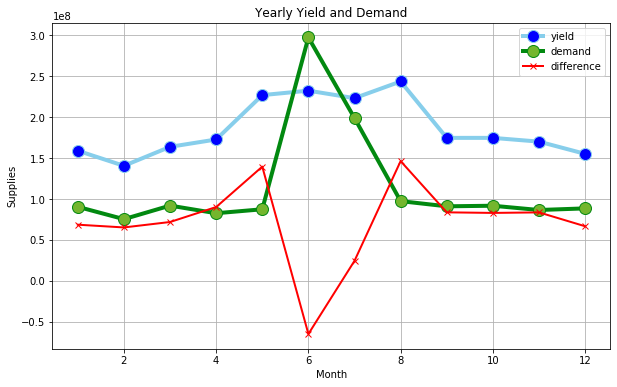

In [141]:
plt.figure(figsize = (10,6))
plt.plot('month', 'yield', data=yield_demand, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('month', 'demand', data=yield_demand, marker='o', markerfacecolor='#74B62E', markersize=12, color='#028910', linewidth=4)
plt.plot('month', 'difference', data=yield_demand, marker='x', color='red',linewidth=2)

plt.title("Yearly Yield and Demand")
plt.xlabel('Month')
plt.ylabel('Supplies')
plt.grid()
plt.legend()

Ref: https://python-graph-gallery.com/122-multiple-lines-chart/

#### Observations :
 - From the _June_ (month 6) to _August_ (month 8), the demand for `ing_w` increases. The most probable reason for this is that the summer holidays in northen hemisphere begins from **last week of June** or **first week of July**. 
 - Since it is the holiday season, the tourism industry also takes off which results in increased suppy of the ingredient `ing_w`.
 - All year long, the demand-supply difference line is close to the demand line, which means it would be difficult to meet the demand requirements in June.


Ref: https://www.goodschoolsguide.co.uk/international/australia/northern-hemisphere-v-southern-hemisphere

As we can see that in June, we fall short of **-65042109.0** amount of supplies. The demand-suuply difference line being close to the demand means there are very less possibilities of storing the inventory for longer period of time. 


---



---



## <center>Conclusion</center>

>  It is very necessary for us to meet the demand and supply in the month of June 2017, as we fall short of **-65042109.0** amount of supplies short. 
The possible solution(s) to this problem are:
  1. Asking the farming companies to increase the yield of ingrident `ing_w`.
  2. Importing ingredient `ing_w` from other locations/provinces/countries.
 
> This demand-supply shrotage may have many possible reasons, like inappropriate weather conditions, insufficient rains, increased population, etc. However as a business, it is necessary to fulfil the demand requirements to be able to sustain in the marketplace. 

___

## <center>Quality of data</center>

- Inferring that the crops are seasonal, it is challeging to predict the trend and randomness due to lack of data. The data only consisted of year **2016**. Had we had more past data, we would have been easy for us to explore trend(s). 
- In the original dataframes(`farm_id.csv` and `train_weather.csv`), there were a lot of **NULL** values. These values/features were either droppped or be imputed using `fillna()`. 
- Overall, the data could be understood and a lot of inferences could be made out of them.

___
## <center>References</center>
 - https://seaborn.pydata.org/examples/many_pairwise_correlations.html
 - https://en.wikipedia.org/wiki/Earth_rainfall_climatology
 - https://www.geeksforgeeks.org/python-pandas-dataframe-subtract/
 - https://python-graph-gallery.com/122-multiple-lines-chart/
 - https://www.goodschoolsguide.co.uk/international/australia/northern-hemisphere-v-southern-hemisphere

#### <center>END OF REPORT</center>